The objective of this notebook is to do an first basic exploratory analysis of the training part of the dataset and check its characteristics

## Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
df = pd.read_csv("../../data/bronze/raw_train.csv", )
df

,email,label
0,get up to escapenumber escapenumber emergency ...,spam
1,dear customer the pharmacy you shop at got too...,spam
2,please find below the gtv project status updat...,ham
3,fuller harder\nerectionsthe same as the one fr...,spam
4,thinking of breathing new life into your busin...,spam
...,...,...
75936,we are grateful to all our devoted customers a...,spam
75937,You have registered Sinco as Payee. Log in at ...,ham
75938,seize the opportunity escapenumber anatrim esc...,spam
75939,hi all attached is a patch that minimally enab...,ham


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75941 entries, 0 to 75940
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   75941 non-null  object
 1   label   75941 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [5]:
df.describe()


,email,label
count,75941,75941
unique,75604,2
top,"Sorry, I'll call later",ham
freq,23,39058


- We have a dataset with total amount of 75941 rows
- There are two unique categories: "ham" and "spam" and 75604 unique messages
- The most common category is "ham" that appears 39058 times and the most common message is "Sorry, I'll call later", a total of 23 times? wow, this sounds like whatsapp!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75941 entries, 0 to 75940
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   75941 non-null  object
 1   label   75941 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


## Change data types

More specific data types consume less memory and allow more efficient data manipulation, etc. email column type is worthless since pandas uses "object" for strings too

In [7]:
df['label'] = df['label'].map({"ham": 0, "spam": 1}).astype(int)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75941 entries, 0 to 75940
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   75941 non-null  object
 1   label   75941 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


## Duplicated rows analysis

What is the amount of duplicated emails? And its percentage?

In [9]:
# create a dataframe with the duplicated rows grouped by label
duplicated_by_label = df[df.duplicated(keep=False)].groupby('label').size().rename("duplicated_by_label").reset_index()

# create a dataframe with the sum of rows of each label and change its name with total_rows
category_counts = df['label'].value_counts().reset_index()
category_counts.columns = ['label', 'total_rows_label']

#merge both dataframes
duplicated_by_label = duplicated_by_label.merge(category_counts, on='label')

#add a column with the percentage of duplicated per class
duplicated_by_label['total_rows_data'] = df.value_counts().sum()
duplicated_by_label['percent_duplicates_label'] = round(duplicated_by_label['duplicated_by_label'] / duplicated_by_label['total_rows_data'] * 100, 2)

duplicated_by_label

,label,duplicated_by_label,total_rows_label,total_rows_data,percent_duplicates_label
0,0,422,39058,75941,0.56
1,1,166,36883,75941,0.22


Oh wow, I expected the duplicates to be more present in the spam emails and the experience tells me that spam emails are generical and sent to everyone. This means that our dataset has been trimmed before published.

It would be interesting to find those repeated emails or understand the way these datasets were created and which sources they use for further analysis.

-----------

Are there emails that belong to both categories? I assume they are mistakes but in case we have them, we should check what's their origin


In [10]:
# create a dataframe with the duplicated emails grouped by email and filter them by unique value of label > 1, so one 0 label and one 1 label
emails_with_conflicting_labels = df[df.duplicated(keep=False)].groupby('email').filter(lambda x: x['label'].nunique() > 1)
emails_with_conflicting_labels

,email,label


There are none, that is a good symptom

## Distribution of unique HAM VS. SPAM messages

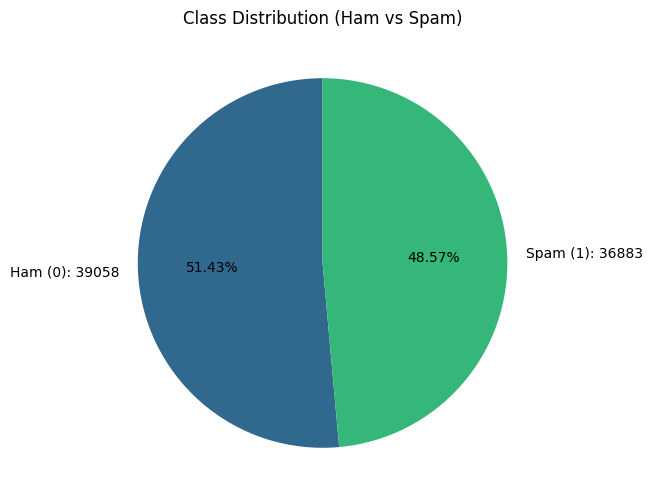

In [11]:
category_counts = df['label'].value_counts()
category_labels = ["Ham (0)", "Spam (1)"]

viridis_colors = sns.color_palette("viridis", len(category_counts))

plt.figure(figsize=(6, 6))
plt.pie(
    category_counts,
    labels=[f"{label}: {count}" for label, count in zip(category_labels, category_counts)], 
    autopct=lambda p: f"{p:.2f}%",  
    colors=viridis_colors,  
    startangle=90,  
)
plt.title("Class Distribution (Ham vs Spam)")
plt.show()


The train dataset contains the same proportion of classes than the raw dataset. Good.

## Word count distribution

What is the distribution of the word count?

In [12]:
df['word_count'] = df['email'].apply(lambda x: len(x.split()))
count_of_words = df.groupby(['word_count', 'label']).size().reset_index(name='count')
count_of_words

,word_count,label,count
0,1,0,49
1,1,1,53
2,2,0,37
3,2,1,29
4,3,0,83
...,...,...,...
3564,28001,0,1
3565,33037,0,1
3566,34898,0,1
3567,45448,0,1


The variance of our dataset is very huge

In [16]:
count_of_words.tail(20)

,word_count,label,count
3549,15500,0,1
3550,15914,0,1
3551,15943,0,1
3552,16019,0,1
3553,16876,0,1
3554,17305,0,1
3555,17602,0,1
3556,17952,0,1
3557,18963,0,1
3558,20002,0,1


/tmp/ipykernel_132757/1670958476.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=count_of_words, x='label', y='word_count', palette="viridis")


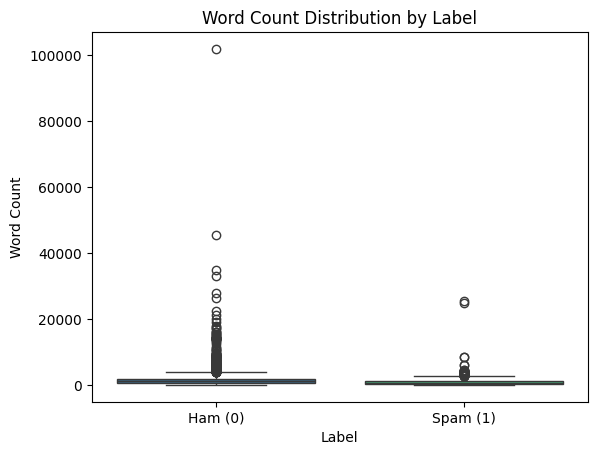

In [17]:
sns.boxplot(data=count_of_words, x='label', y='word_count', palette="viridis")

plt.xticks(ticks=[0, 1], labels=["Ham (0)", "Spam (1)"])
plt.title("Word Count Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Word Count")
plt.show()


The variance of the ham emails is higher than in the spam emails. That could be an indicative of the emails would have a higher probability to be ham...

------------------------
Let's remove some outliers 

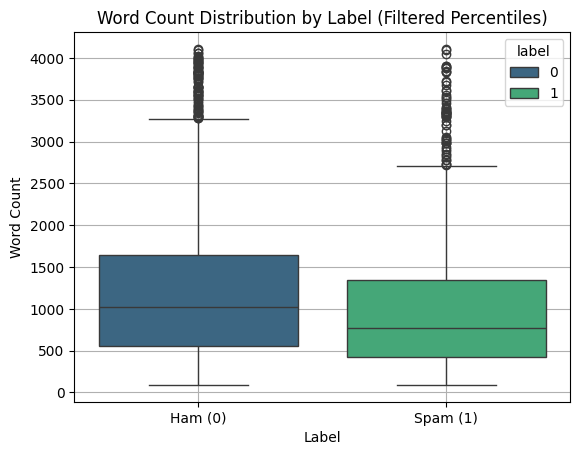

In [20]:
lower_percentile = count_of_words['word_count'].quantile(0.05)
upper_percentile = count_of_words['word_count'].quantile(0.95)
filtered_data = count_of_words[
    (count_of_words['word_count'] >= lower_percentile) & 
    (count_of_words['word_count'] <= upper_percentile)
]
sns.boxplot(data=filtered_data, x='label', hue = 'label', y='word_count', palette="viridis")
plt.xticks(ticks=[0, 1], labels=["Ham (0)", "Spam (1)"])
plt.title("Word Count Distribution by Label (Filtered Percentiles)")
plt.xlabel("Label")
plt.ylabel("Word Count")
plt.grid()
plt.show()


The median shows us that amount of words used in the ham emails tends to be higher than in spam messages. 

The 75% of the ham emails are below 3300 words meanwhile the same percentage in spam emails tends to be lower ene though there are a lot of outliers in both classes. 

## Char count distribution

What is the distribution of the character count?


In [31]:
df['char_count'] = df['email'].apply(len)

count_of_chars = df.groupby(['char_count', 'label']).size().reset_index(name='count')
count_of_chars



,char_count,label,count
0,1,0,1
1,1,1,1
2,2,0,7
3,2,1,4
4,3,0,8
...,...,...,...
11506,156208,0,1
11507,165933,0,1
11508,178837,0,1
11509,228353,0,1


In [32]:
count_of_chars.tail(20)

,char_count,label,count
11491,90176,0,1
11492,90616,0,1
11493,92756,0,1
11494,97546,0,1
11495,102796,0,1
11496,103422,0,1
11497,103773,0,1
11498,103878,0,1
11499,106960,0,1
11500,113525,0,1


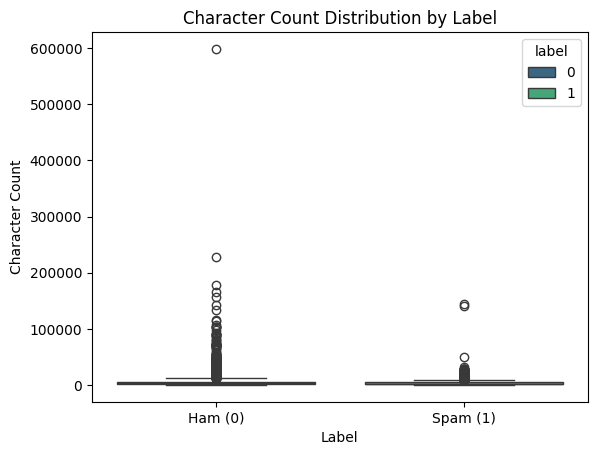

In [34]:
sns.boxplot(data=count_of_chars, x='label', y='char_count', hue = 'label', palette="viridis")

plt.xticks(ticks=[0, 1], labels=["Ham (0)", "Spam (1)"])
plt.title("Character Count Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Character Count")
plt.show()


Same behaviour as with word counts, the variance in the ham emails is higher than in spam emails. Why that can be? Maybe the ham messages tend to use a more formal vocabulary? Spam messages use more slang? This would be a good path to follow for further research.

-----------

Let's remove some outliers here too 

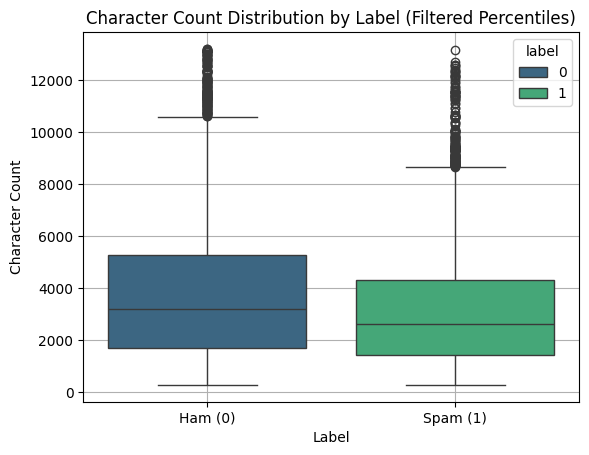

In [35]:
lower_percentile = count_of_chars['char_count'].quantile(0.05)
upper_percentile = count_of_chars['char_count'].quantile(0.95)
filtered_data = count_of_chars[
    (count_of_chars['char_count'] >= lower_percentile) & 
    (count_of_chars['char_count'] <= upper_percentile)
]
sns.boxplot(data=filtered_data, x='label', hue = 'label', y='char_count', palette="viridis")
plt.xticks(ticks=[0, 1], labels=["Ham (0)", "Spam (1)"])
plt.title("Character Count Distribution by Label (Filtered Percentiles)")
plt.xlabel("Label")
plt.ylabel("Character Count")
plt.grid()
plt.show()


It's very curious. There must be something to do with the type of vocabulary that is used. Maybe abbreviations are used for spam? Maybe we could check the spelling so the abbreviations can help us in this. 

## Most common words in each class

I used special_chars_analysis notebook to perform a first analysis of characters that could be cleaned or transformed along with the removal of the stopwords

In [61]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import re
from string import punctuation

def clean_text(text):
    special_replacements = {
        r"£": "pound",
        r"\$": "dollar",
        r"\€": "euro",
        r"%": "percentage", 
        r"ì": "i",
        r"ü": "you",
        }
    
    emoticon_pattern = re.compile(r"""
    [:;=Xx]           
    [-~]?             
    [\)\]\(\[dDpP/]   
    """, re.VERBOSE)
    
    for pattern, replacement in special_replacements.items():
        text = re.sub(pattern, replacement, text)
    text = re.sub(emoticon_pattern, 'emoji', text)
    text = text.lower()
    text = re.sub('<[^<>]+>', ' ', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub('[0-9]+', 'number', text)
    text = re.sub('[^\s]+@[^\s]+', 'emailaddr', text)
    text = text.translate(str.maketrans('', '', punctuation))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_cleaned = df.copy()
df_cleaned['email']=df_cleaned['email'].apply(clean_text)
df_cleaned['message_tokenized'] = df_cleaned['email'].apply(word_tokenize)

def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)


df_cleaned['message_clean'] = df_cleaned['message_tokenized'].apply(remove_stopwords)
df_cleaned

,email,label,word_count,char_count,message_tokenized,message_clean
0,get up to escapenumber escapenumber emergency cash escapenumber tr no credit checks cash in your account overnight confident ial and secure online instant approval escapenumber tr,1,26,180,"[get, up, to, escapenumber, escapenumber, emergency, cash, escapenumber, tr, no, credit, checks, cash, in, your, account, overnight, confident, ial, and, secure, online, instant, approval, escapenumber, tr]",get escapenumber escapenumber emergency cash escapenumber tr credit checks cash account overnight confident ial secure online instant approval escapenumber tr
1,dear customer the pharmacy you shop at got too eemojiensive why spend more if you have the opportunity to buy medications of the same generic quality for less games are worth playing with anything but your health and the growing number of cases of drug poisoning proves this sad statement canadianpharmacy lets you shop for drugs without having to worry about their quality canadianpharmacy cheapest generic medications from licensed canadian manufacturers canadianpharmacy no one is able to match our prices for generic medications neither in canada nor in the usa yours faithfully tammie wise,1,94,591,"[dear, customer, the, pharmacy, you, shop, at, got, too, eemojiensive, why, spend, more, if, you, have, the, opportunity, to, buy, medications, of, the, same, generic, quality, for, less, games, are, worth, playing, with, anything, but, your, health, and, the, growing, number, of, cases, of, drug, poisoning, proves, this, sad, statement, canadianpharmacy, lets, you, shop, for, drugs, without, having, to, worry, about, their, quality, canadianpharmacy, cheapest, generic, medications, from, licensed, canadian, manufacturers, canadianpharmacy, no, one, is, able, to, match, our, prices, for, generic, medications, neither, in, canada, nor, in, the, usa, yours, faithfully, tammie, wise]",dear customer pharmacy shop got eemojiensive spend opportunity buy medications generic quality less games worth playing anything health growing number cases drug poisoning proves sad statement canadianpharmacy lets shop drugs without worry quality canadianpharmacy cheapest generic medications licensed canadian manufacturers canadianpharmacy one able match prices generic medications neither canada usa faithfully tammie wise
2,please find below the gtv project status update for this week please see the attached file for the project timeline update in microsoft project gtv status meeting attendees dave nommensen karima husain francis lim jeremy wong bill fortney nayan dattani russ severson narasim kasaru mike swaim chuck ames jay krish accomplishments incorporating physcial deal positions in tds o changes to cpr reader process waiting for user acceptance testing plans for the week ending number number number continue it development of phase i items continue it development of phase number issues issues open items to be determined whether group of groups on cash positions must be included in the rollout to be determined whether cash total needs to be included in position manager rollout and how excluding the above number items rollout to production is planned for mid may thanks dave n,0,184,933,"[please, find, below, the, gtv, project, status, update, for, this, week, please, see, the, attached, file, for, the, project, timeline, update, in, microsoft, project, gtv, status, meeting, attendees, dave, nommensen, karima, husain, francis, lim, jeremy, wong, bill, fortney, nayan, dattani, russ, severson, narasim, kasaru, mike, swaim, chuck, ames, jay, krish, accomplishments, incorporating, physcial, deal, positions, in, tds, o, changes, to, cpr, reader, process, waiting, for, user, acceptance, testing, plans, for, the, week, ending, number, number, number, continue, it, development, of, phase, i, items, continue, it, development, of, phase, number, issues, issues, open, items, to, be, determined, whether, group, of, groups, ...]",please find gtv proj

In [62]:
word = "I'm"

if word in stop_words:
    print(f"'{word}' is a stopword.")
else:
    print(f"'{word}' is not a stopword.")


'I'm' is not a stopword.


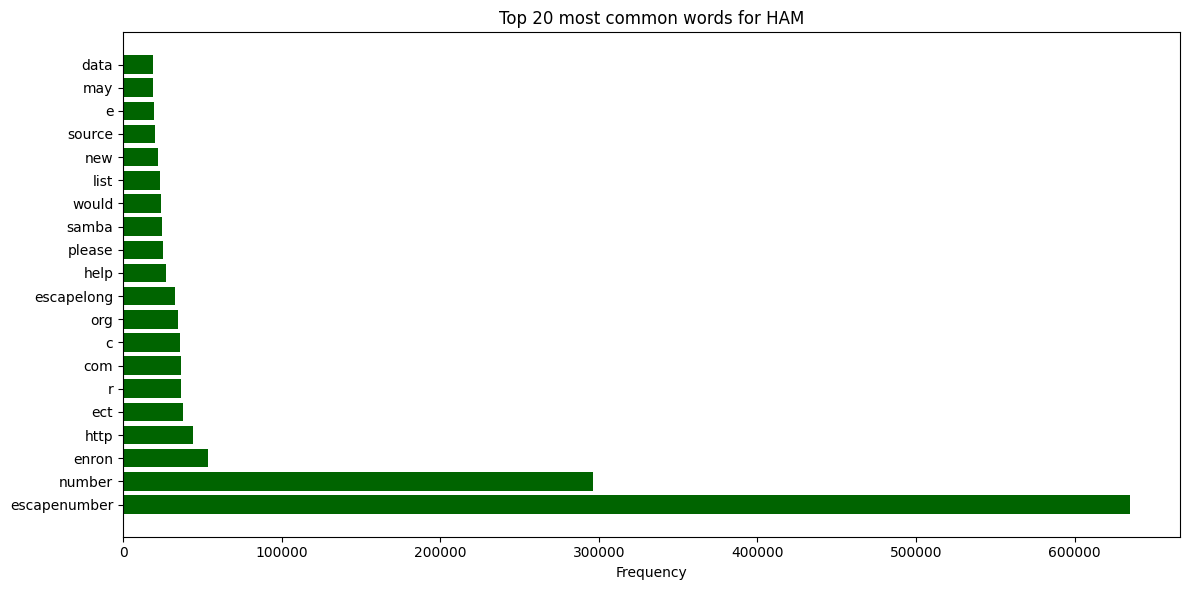

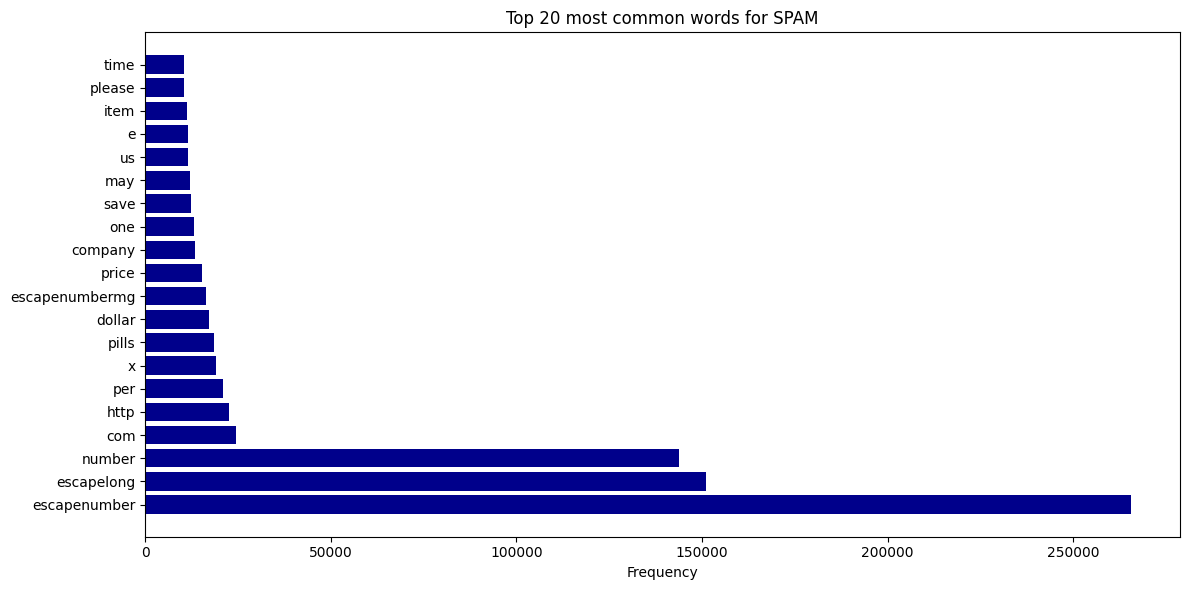

In [63]:
from collections import Counter

ham_data = df_cleaned[df_cleaned['label'] == 0]
spam_data = df_cleaned[df_cleaned['label'] == 1]

ham_words = Counter(" ".join(ham_data["message_clean"]).split()).most_common(20)
spam_words = Counter(" ".join(spam_data["message_clean"]).split()).most_common(20)

ham_words_list, ham_counts = zip(*ham_words)
spam_words_list, spam_counts = zip(*spam_words)

plt.figure(figsize=(12, 6))
plt.barh(ham_words_list, ham_counts, color="darkgreen")
plt.xlabel('Frequency')
plt.title('Top 20 most common words for HAM')
plt.tight_layout()

plt.figure(figsize=(12, 6))
plt.barh(spam_words_list, spam_counts, color="darkblue")
plt.xlabel('Frequency')
plt.title('Top 20 most common words for SPAM')
plt.tight_layout()

plt.show()


Most common words in each class are different. That will help the model to differentiate between types of emails.

There is a lot of misspelling in both HAM and SPAM e-mails (u, ur, ill, etc), grammatical errors (poundnumber, numberp) and abbreviations (x, ect? what does that even mean?) 

Finding a spelling corrector and/or create a dictionary with misspellings would be a nice idea.


In [64]:
com = df_cleaned[df_cleaned['message_tokenized'].apply(lambda x: 'com' in x)]
# pd.set_option('display.max_colwidth', None)
com['email'].head(1)

5    can you return a phone call could you do it if it made you good moolah then call the information line to hear how oh the sun is shining and things are better each day i get to stay home and relax on my porch while i simply return phone calls each day this can be you also if you want it to be the potential to generate up to escapenumberooo each week is there so pick up that telephone and call my information line escapenumber escapenumber escapenumber get back to me via escapelong comfortmgmtsvc com if not lnterested depression is merely anger without enthusiasm
Name: email, dtype: object

# ideas for future step:

- find a good dictionary and a verbal conjugation set for verbs in english, pass it to the dataset and extract the words that are not on it. Then try to figure out where they come from (spelling errors, slang, etc.)

- study chat-words 

- check if there are other languages in the dataset that are not english. 

- analyse bi-grams and tri-grams for each label

- emojis have been cleaned as emoji, try to create more categories related to feelings


